## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df["APPLICATION_TYPE"].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = app_counts[app_counts < 528].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

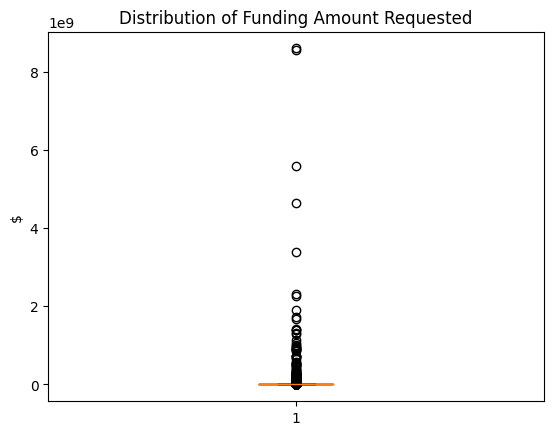

In [7]:
# Assessing outliers for ASK_AMT var 
import numpy as np
import matplotlib.pyplot as plt

# creating boxplot for the ask amount
ask_amount = application_df['ASK_AMT'].tolist()
fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of Funding Amount Requested')
ax1.set_ylabel('$')
ax1.boxplot(ask_amount)
plt.show()

In [8]:
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(ask_amount,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)
potential_outliers = []
# potential_outliers = [potential_outliers.append(amount) if amount < lower_bound or amount > upper_bound else next for amount in ask_amount]

for amount in ask_amount:
    if amount < lower_bound or amount > upper_bound:
        potential_outliers.append(amount)

print(f"There are {len(potential_outliers)} potential outliers out of {application_df.shape[0]} records")
print(f"That is {len(potential_outliers)/application_df.shape[0]*100}% of the records")

There are 8206 potential outliers out of 34299 records
That is 23.924895769555967% of the records


In [9]:
"""Given that there are so many potential outliers for the amount, it doesn't make sense to get rid of these outliers, 
so I'll try other optimization methods. First I'll take out the CLASSIFICATION feature (Government organization classification),
as well as the AFFILIATION feature (Affiliated sector of industry). Intuitively these features don't seem to me like they are important, 
and they have many categories each"""

# Dropping the CLASSIFICATION and AFFILIATION features and saving into new df
application_df_reduced = application_df.drop(columns=['CLASSIFICATION', 'AFFILIATION'])
application_df_reduced.head()

,APPLICATION_TYPE,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,ProductDev,Association,1,0,N,5000,1
1,T3,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,ProductDev,Association,1,0,N,5000,0
3,T3,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Heathcare,Trust,1,100000-499999,N,142590,1


In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_reduced = pd.get_dummies(application_df_reduced)
application_df_reduced.head() 

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [11]:
# Split our preprocessed data into our features and target arrays
y = application_df_reduced['IS_SUCCESSFUL'].values
X = application_df_reduced.drop(columns = 'IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled.shape

(25724, 31)

## Compile, Train and Evaluate the Model on the DataFrame with the Reduced Features <br> 
(First Optimization Try) 

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  40
hidden_nodes_layer2 = 30
"""I reduced the number of nodes in the first hidden layer form 80 in the initial model to 40 here"""

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1280      
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,541
Trainable params: 2,541
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 6s 4ms/step - loss: 0.6498 - accuracy: 0.6228
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.6401 - accuracy: 0.6320
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6389 - accuracy: 0.6323
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.6387 - accuracy: 0.6329
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6381 - accuracy: 0.6334
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6378 - accuracy: 0.6338
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6370 - accuracy: 0.6340
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6371 - accuracy: 0.6340
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6370 - accuracy: 0.6348
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6366 - accura

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6366 - accuracy: 0.6352 - 542ms/epoch - 2ms/step
Loss: 0.6366212368011475, Accuracy: 0.6352186799049377


In [17]:
"""Since the accuracy and loss are worse than the initial model, I will try other optimization methods. 
My second attempt is to add another hidden layer. But first I have to had back the features I took out and re-process the data"""

'Since the accuracy and loss are worse than the initial model, I will try other optimization methods. \nMy second attempt is to add another hidden layer. But first I have to had back the features I took out and re-process the data'

##Adding Back the Removed Features and Reprocessing the Data

In [6]:
# Combining categories into 'Other' for the CLASSIFICATION variable
class_counts = application_df["CLASSIFICATION"].value_counts()
classifications_to_replace = class_counts[class_counts < 1883].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
application_df.nunique()

APPLICATION_TYPE             9
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

In [8]:
# Split the preprocessed complete data into features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(columns = 'IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
len(X_train[0])

43

## Compile, Train and Evaluate the Model with an Additional Hidden Layer <br> 
(Second Optimization Try)

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  40
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 30

nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                1760      
                                                                 
 dense_4 (Dense)             (None, 30)                1230      
                                                                 
 dense_5 (Dense)             (None, 30)                930       
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,951
Trainable params: 3,951
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Train the model
fit_model = nn1.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5755 - accuracy: 0.7193
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5543 - accuracy: 0.7308
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5518 - accuracy: 0.7310
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5507 - accuracy: 0.7325
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5493 - accuracy: 0.7345
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5485 - accuracy: 0.7342
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5474 - accuracy: 0.7355
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5475 - accuracy: 0.7350
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5461 - accuracy: 0.7345
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5466 - accura

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5564 - accuracy: 0.7265 - 433ms/epoch - 2ms/step
Loss: 0.5564491748809814, Accuracy: 0.7265306115150452


In [39]:
"""Since the accuracy and loss are not much better than the initial model, I will try now to increase the number of epochs and change 
the activization model in the hidden layers. I'll go back to two layers, since adding another one didn't help"""

"Since the accuracy and loss are not much better than the initial model, I will try now to increase the number of epochs and change \nthe activization model in the hidden layers. I'll go back to two layers, since adding another one didn't help"

## Compile, Train and Evaluate the Model with Different Activation Method and More Epochs <br>
(Third Optimization Try)

In [40]:
from pandas.compat import np_version_under1p21
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  40
hidden_nodes_layer2 = 30

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 40)                1760      
                                                                 
 dense_8 (Dense)             (None, 30)                1230      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,021
Trainable params: 3,021
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
# Train the model
fit_model = nn2.fit(X_train_scaled,y_train,epochs=400)

Epoch 1/400
804/804 [==============================] - 2s 2ms/step - loss: 0.5754 - accuracy: 0.7180
Epoch 2/400
804/804 [==============================] - 1s 2ms/step - loss: 0.5573 - accuracy: 0.7312
Epoch 3/400
804/804 [==============================] - 1s 2ms/step - loss: 0.5537 - accuracy: 0.7309
Epoch 4/400
804/804 [==============================] - 1s 2ms/step - loss: 0.5518 - accuracy: 0.7317
Epoch 5/400
804/804 [==============================] - 1s 2ms/step - loss: 0.5507 - accuracy: 0.7324
Epoch 6/400
804/804 [==============================] - 1s 2ms/step - loss: 0.5492 - accuracy: 0.7327
Epoch 7/400
804/804 [==============================] - 2s 2ms/step - loss: 0.5483 - accuracy: 0.7318
Epoch 8/400
804/804 [==============================] - 2s 2ms/step - loss: 0.5477 - accuracy: 0.7332
Epoch 9/400
804/804 [==============================] - 1s 2ms/step - loss: 0.5471 - accuracy: 0.7339
Epoch 10/400
804/804 [==============================] - 1s 2ms/step - loss: 0.5466 - accura

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5587 - accuracy: 0.7251 - 565ms/epoch - 2ms/step
Loss: 0.558726966381073, Accuracy: 0.7251312136650085


## Compile, Train and Evaluate the Model using Automated Tuning Approach <br>
(Fourth Optimization Try)

In [14]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(
        units=hp.Int('first_units',
                     min_value=20,
                     max_value=40,
                     step=5),
        activation=activation,
        input_dim=43))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=10,
            max_value=50,
            step=10),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Set the number of epochs
    epochs = hp.Int('epochs', 100, 200, step=10)

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [11]:
!pip install keras_tuner
# Import the kerastuner library
import keras_tuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
# Setting the tuner
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=150,
    hyperband_iterations=2)

In [16]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=200,validation_data=(X_test_scaled,y_test))

Trial 138 Complete [00h 00m 29s]
val_accuracy: 0.7273469567298889

Best val_accuracy So Far: 0.7286297082901001
Total elapsed time: 00h 22m 22s

Search: Running Trial #139

Value             |Best Value So Far |Hyperparameter
relu              |relu              |activation
40                |35                |first_units
5                 |5                 |num_layers
40                |30                |units_0
170               |200               |epochs
30                |30                |units_1
40                |40                |units_2
50                |10                |units_3
50                |30                |units_4
17                |17                |tuner/epochs
6                 |6                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
2                 |2                 |tuner/round
0107              |0102              |tuner/trial_id

Epoch 7/17
804/804 [==============================] - 4s 3ms/step - loss: 0.5489 - acc

KeyboardInterrupt: ignored

In [20]:
"""Note that I ran the automization model several times with adjustments here and ther. At one point I ran it for an hour and a half with no improvement in performence. 
In this saved version, I interuupted the process after 20 min, because I didn't see significant changes"""

"Note that I ran the automization model several times with adjustments here and ther. At one point I ran it for an hour and a half with no improvement in performence. \nIn this saved version, I interuupted the process after 20 min, because I didn't see significant changes"

In [17]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 35,
 'num_layers': 5,
 'units_0': 30,
 'epochs': 200,
 'units_1': 30,
 'units_2': 40,
 'units_3': 10,
 'units_4': 30,
 'tuner/epochs': 17,
 'tuner/initial_epoch': 6,
 'tuner/bracket': 4,
 'tuner/round': 2,
 'tuner/trial_id': '0102'}

In [18]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5547 - accuracy: 0.7286 - 605ms/epoch - 2ms/step
Loss: 0.5546852946281433, Accuracy: 0.7286297082901001


In [22]:
# Export our model to HDF5 file
best_model.save('AlphabetSoupCharity_Optimization.h5')